In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('hour.csv')
df=df.drop(['instant','dteday','temp','casual','registered'],axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,1


In [3]:
def pairplot (df):
    sns.pairplot(df)

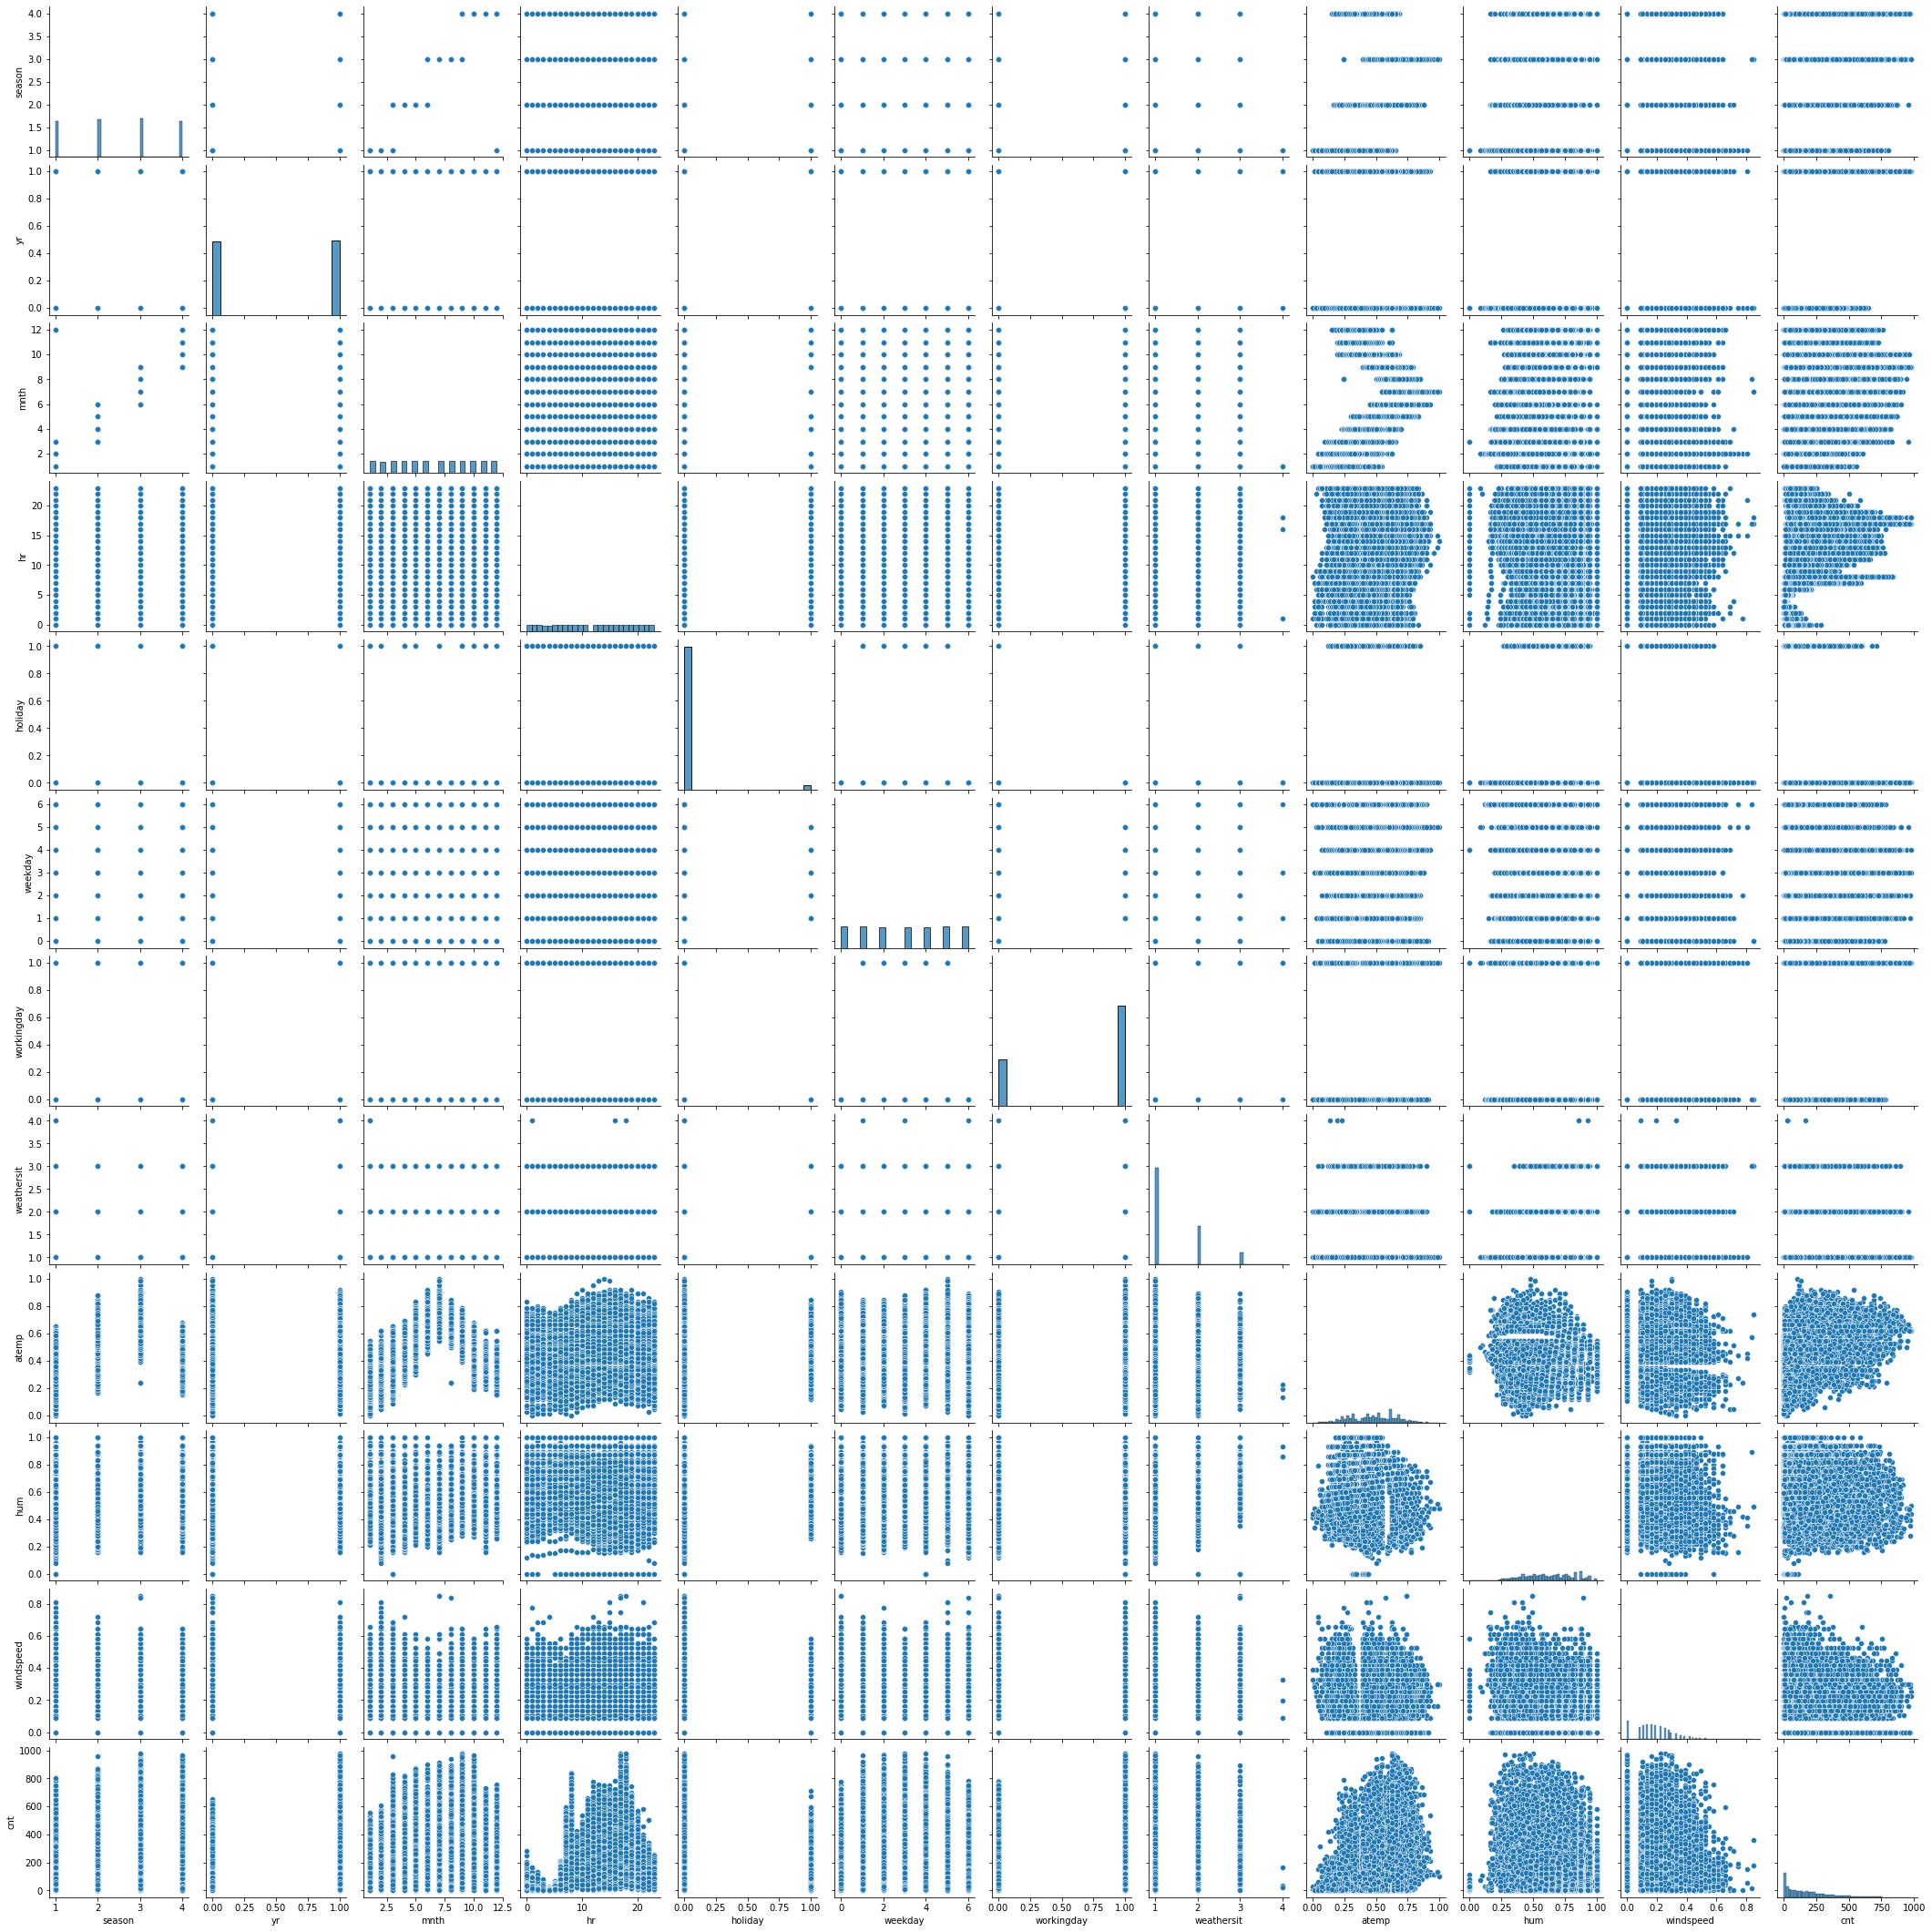

In [4]:
# pairplot(df)

In [5]:
df=df.drop('hum',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   atemp       17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  cnt         17379 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.5 MB


In [7]:
def get_dummy(df,columns=[]):
    df=pd.get_dummies(df,columns=columns)
    return df


In [8]:
df=get_dummy(df,['holiday','workingday','weathersit'])

In [9]:
X= df.loc[:,df.columns != 'cnt'].values
Y=df.loc[:,'cnt'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y , test_size=0.17 , random_state=85 )


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_t=StandardScaler()
def scaler(X_train,x_test,Y_train):
    scaler=StandardScaler()
    scaler_t=StandardScaler()
    X_train=scaler.fit_transform(X_train,Y_train)
    x_test=scaler.transform(x_test)
    Y_train=scaler_t.fit_transform(Y_train.reshape(-1,1))
    return X_train,x_test,Y_train

In [12]:
X_train,x_test,Y_train=scaler(X_train,x_test,Y_train)

# linear

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_test=scaler_t.fit_transform(y_test.reshape(-1,1))

In [14]:
y_predict=reg.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

0.6406112222838675

# Ridge

In [44]:
from sklearn.linear_model import Ridge
rid=Ridge(alpha=2)
rid.fit(X_train,Y_train)
y_predict=rid.predict(x_test)
mean_squared_error(y_test,y_predict)

0.6407297572884235

# Svr

In [ ]:
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
# from sklearn.svm import SVR

# opt=BayesSearchCV(SVR(),{'C':Integer(1,3,prior='uniform'),'kernel':Categorical(['linear','rbf'])},n_jobs=-1)
# opt.fit(X_train,Y_train)
# y_predict=opt.predict(x_test)
# mean_squared_error(y_test,y_predict)

In [93]:
from sklearn.svm import SVR
regr=SVR(C=3)
regr.fit(X_train,Y_train)
y_predict=regr.predict(x_test)
mean_squared_error(y_test,y_predict)

/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.40869164006481534

# Randomforest

In [86]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(min_samples_split=3,min_samples_leaf=10,n_jobs=-1)
regr.fit(X_train,Y_train)


/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_2938/3926266421.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)


RandomForestRegressor(min_samples_leaf=10, min_samples_split=3, n_jobs=-1)

In [87]:
y_predict=regr.predict(x_test)
mean_squared_error(y_test,y_predict)

0.0838671604047895

# stacking

In [96]:
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
estimators=[('SVR',SVR(C=3)),('linear',LinearRegression()),('randomforest',RandomForestRegressor(min_samples_split=3,min_samples_leaf=10,n_jobs=-1))]
clf=StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(min_samples_split=70,min_samples_leaf=30))

In [142]:
clf.fit(X_train,Y_train)
y_predict=clf.predict(x_test)
mean_squared_error(y_test,y_predict)

/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.08144660012256658

In [119]:
y_predict=clf.predict(X_train)
mean_squared_error(Y_train,y_predict)

0.05581011897088836

بهترین randomforest